# Exercise 0 

## Task 1: Recreate graphs

In [5]:
# a) Here we use subplots to get two axes in one figure

In [34]:
import pandas as pd

df = pd.read_csv("data/Steam Top 100 Played Games - List.csv")

In [35]:
print(df.dtypes)

Rank                int64
Name               object
Thumbnail URL      object
Store Link         object
Price              object
Current Players    object
Peak Today         object
Genre Tags         object
dtype: object


In [ ]:
df['Current Players'] = pd.to_numeric(df['Current Players'].str.replace(',', '', regex=False), errors='coerce')
df['Peak Today'] = pd.to_numeric(df['Peak Today'].str.replace(',', '', regex=False), errors='coerce')

In [37]:
print(df.dtypes)

Rank                int64
Name               object
Thumbnail URL      object
Store Link         object
Price              object
Current Players     int64
Peak Today          int64
Genre Tags         object
dtype: object


In [38]:
df.head(5)

,Rank,Name,Thumbnail URL,Store Link,Price,Current Players,Peak Today,Genre Tags
0,1,Counter-Strike 2,https://shared.cloudflare.steamstatic.com//sto...,https://store.steampowered.com/app/730/Counter...,Free To Play,1485535,1489929,"FPS, Shooter, Multiplayer, Competitive, Action..."
1,2,PUBG: BATTLEGROUNDS,https://shared.cloudflare.steamstatic.com//sto...,https://store.steampowered.com/app/578080/PUBG...,Free To Play,765150,765150,"Survival, Shooter, Battle Royale, Multiplayer,..."
2,3,Dota 2,https://shared.cloudflare.steamstatic.com//sto...,https://store.steampowered.com/app/570/Dota_2?...,Free To Play,698757,715295,"Free to Play, MOBA, Multiplayer, Strategy, eSp..."
3,4,Marvel Rivals,https://shared.cloudflare.steamstatic.com//sto...,https://store.steampowered.com/app/2767030/Mar...,Free To Play,312427,565653,"Free to Play, Multiplayer, Hero Shooter, Third..."
4,5,Path of Exile 2,https://shared.cloudflare.steamstatic.com//sto...,https://store.steampowered.com/app/2694490/Pat...,£23.93,258475,288757,"Action RPG, Hack and Slash, RPG, Action, Souls..."


In [56]:
df['Price'] = df['Price'].str.replace('Free To Play', '0', regex=False)
df['Price'] = pd.to_numeric(df['Price'].str.replace('£', '', regex=False), errors='coerce')
df.head(5)

,Rank,Name,Thumbnail URL,Store Link,Price,Current Players,Peak Today,Genre Tags
0,1,Counter-Strike 2,https://shared.cloudflare.steamstatic.com//sto...,https://store.steampowered.com/app/730/Counter...,0.00,1485535,1489929,"FPS, Shooter, Multiplayer, Competitive, Action..."
1,2,PUBG: BATTLEGROUNDS,https://shared.cloudflare.steamstatic.com//sto...,https://store.steampowered.com/app/578080/PUBG...,0.00,765150,765150,"Survival, Shooter, Battle Royale, Multiplayer,..."
2,3,Dota 2,https://shared.cloudflare.steamstatic.com//sto...,https://store.steampowered.com/app/570/Dota_2?...,0.00,698757,715295,"Free to Play, MOBA, Multiplayer, Strategy, eSp..."
3,4,Marvel Rivals,https://shared.cloudflare.steamstatic.com//sto...,https://store.steampowered.com/app/2767030/Mar...,0.00,312427,565653,"Free to Play, Multiplayer, Hero Shooter, Third..."
4,5,Path of Exile 2,https://shared.cloudflare.steamstatic.com//sto...,https://store.steampowered.com/app/2694490/Pat...,23.93,258475,288757,"Action RPG, Hack and Slash, RPG, Action, Souls..."


In [60]:
import duckdb 

df_players_price = duckdb.query("""--sql
            SELECT 
                Name,
                "Current Players",
                "Price"
             FROM df 
             ORDER BY  "Current Players" DESC
             """).df().iloc[:10]

df_players_price

,Name,Current Players,Price
0,Counter-Strike 2,1485535,0.00
1,PUBG: BATTLEGROUNDS,765150,0.00
2,Dota 2,698757,0.00
3,Marvel Rivals,312427,0.00
4,Path of Exile 2,258475,23.93
5,Grand Theft Auto V,207117,14.80
6,NARAKA: BLADEPOINT,201876,0.00
7,Rust,168002,34.99
8,Palworld,165613,24.99
9,Apex Legends™,150754,0.00


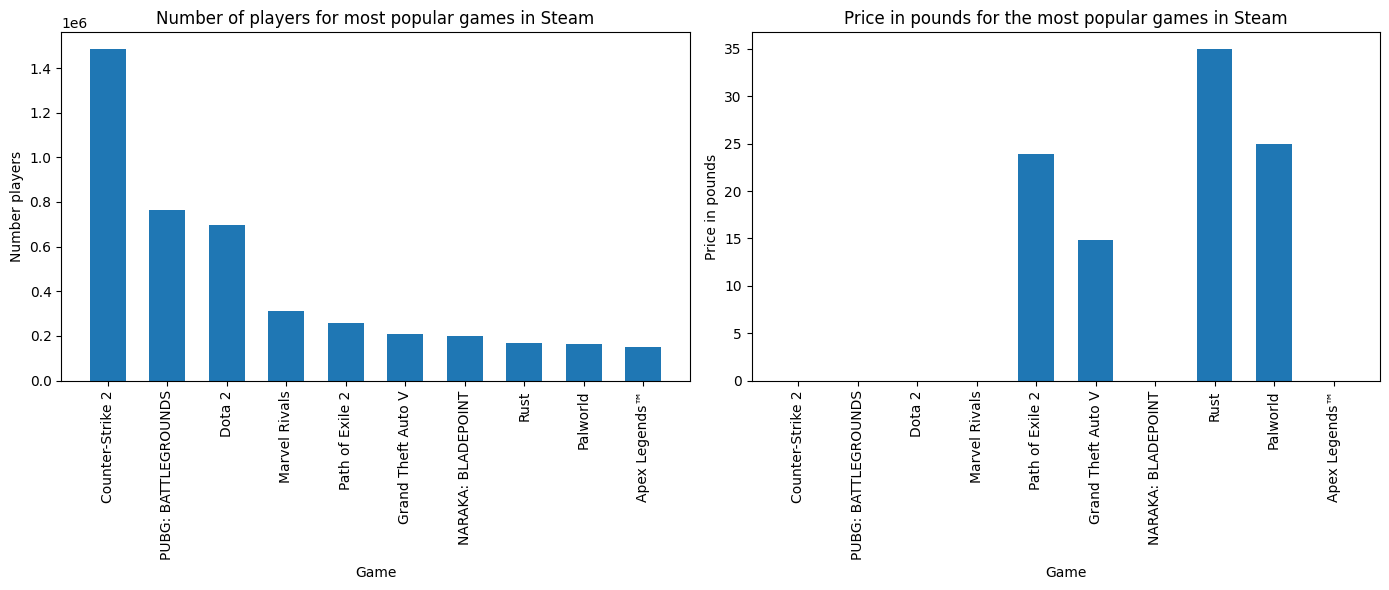

In [70]:
import matplotlib.pyplot as plt

# df_players_price["Name"] is  x-axis labels
names = df_players_price["Name"]

# Step 1: Create the figure and axes
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))  # 1x2 grid

# Step 2: Plot data into each subplot
axs[0].bar(
    x = names,
    height=df_players_price["Current Players"],
    width=0.6,
    )

axs[0].set(
    title="Number of players for most popular games in Steam",
    xlabel="Game",
    ylabel="Number players",
    )

axs[0].set_xticks(range(len(names)))  # Set the tick positions
axs[0].set_xticklabels(df_players_price["Name"], rotation = 90) # Set the labels and rotate

# ----------------------------------------------#
axs[1].bar(
    x = names,
    height=df_players_price["Price"],
    width=0.6,
    )

axs[1].set(
    title="Price in pounds for the most popular games in Steam",
    xlabel="Game",
    ylabel="Price in pounds",
    )

axs[1].set_xticks(range(len(names)))  # Set the tick positions
axs[1].set_xticklabels(df_players_price["Name"], rotation = 90)

# Final layout tweaks
plt.tight_layout()
plt.show()

